In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from tqdm import tqdm
from sklearn.externals import joblib

#### DATADIR to DI PA to train model

In [2]:
DATADIR = "/home/apofeo/Documents/clp_rotated_v3/train"

In [2]:
DATADIR = "/home/apofeo/Documents/symbols_noise_new"

#### DATADIR to DI PA to evaluate model

In [42]:
DATADIR = "im_base_to_angle/DI_PA_Test/test"

#### DATADIR to CI PA to evaluate model

In [3]:
DATADIR = "im_base_to_angle/rotated_5_pa/test"

#### DATADIR to CI NA to evaluate model

In [24]:
DATADIR = "im_base_to_angle/rotated_4_na/test"

In [3]:
directories = [x[0] for x in os.walk(DATADIR)]

In [4]:
# print(directories[1:])
# print(len(directories[1:]))
# print(directories.split("/"))
CATEGORIES = []
for folder in directories[1:]:
    CATEGORIES.append(folder.split("/")[-1])
CATEGORIES = sorted(CATEGORIES)
print(CATEGORIES)
print(len(CATEGORIES))

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'А', 'В', 'Е', 'К', 'М', 'Н', 'О', 'Р', 'С', 'Т', 'У', 'Х']
22


In [3]:
CATEGORIES_INT = [i for i in range(1, 361)]
CATEGORIES = [str(item) for item in CATEGORIES_INT]
# map(str, CATEGORIES)
# print(CATEGORIES)

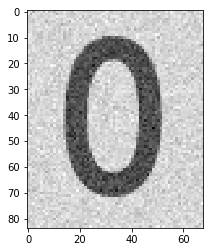

In [5]:
for category in CATEGORIES:  # do dogs and cats
    path = os.path.join(DATADIR,category)  # create path to dogs and cats
    for img in os.listdir(path):  # iterate over each image per dogs and cats
        img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
        plt.imshow(img_array, cmap='gray')  # graph it
        plt.show()  # display!

        break  # we just want one for now so break
    break  #...and one more!

In [56]:
print(img_array)

[[ 88  88  84 ...  70  65  75]
 [ 85  93  98 ...  66  69  75]
 [ 81  89  98 ...  62  56  54]
 ...
 [ 67  73  85 ... 101 103 101]
 [ 40  57  84 ... 102 102  98]
 [ 67  66  80 ... 101 101  96]]


In [6]:
print(img_array.shape)

(84, 68)


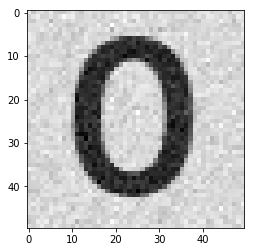

(50, 50)


In [7]:
IMG_SIZE_X, IMG_SIZE_Y = 50, 50

new_array = cv2.resize(img_array, (IMG_SIZE_Y, IMG_SIZE_X))
plt.imshow(new_array, cmap='gray')
plt.show()
print(new_array.shape)

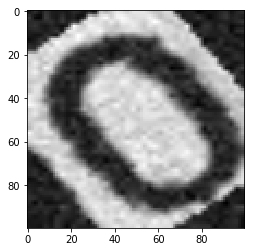

In [34]:
IMG_SIZE = 100

new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap='gray')
plt.show()

In [8]:
training_data = []

In [9]:
def create_training_data():
    for category in CATEGORIES:  # do dogs and cats

        path = os.path.join(DATADIR,category)  # create path to dogs and cats
        class_num = CATEGORIES.index(category)  # get the classification  (0 or a 1). 0=dog 1=cat

        for img in tqdm(os.listdir(path)):  # iterate over each image per dogs and cats
            try:
                img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE) # convert to array
                new_array = cv2.resize(img_array, (IMG_SIZE_Y, IMG_SIZE_X))  # resize to normalize data size
                training_data.append([new_array, class_num])  # add this to our training_data
            except Exception as e:  # in the interest in keeping the output clean...
                pass
            #except OSError as e:
            #    print("OSErrroBad img most likely", e, os.path.join(path,img))
            #except Exception as e:
            #    print("general exception", e, os.path.join(path,img))

In [10]:
create_training_data()

100%|██████████| 7500/7500 [00:02<00:00, 3643.77it/s]


In [63]:
# print(training_data[0])

In [11]:
print(len(training_data))

165000


In [12]:
import random

In [13]:
random.shuffle(training_data)

In [14]:
for sample in training_data[:10]:
    print(sample[1])

1
7
21
7
11
11
1
15
6
7


In [15]:
X = []
Y = []

In [16]:
for features,label in training_data:
    X.append(features)
    Y.append(label)

In [17]:
print(X[0].shape)

(50, 50)


In [21]:
# print(X[0].reshape(-1, IMG_SIZE, IMG_SIZE, 1))

In [18]:
X = np.array(X).reshape(-1, IMG_SIZE_Y, IMG_SIZE_X, 1)

In [19]:
print(type(X))
print(X[0])

<class 'numpy.ndarray'>
[[[32]
  [46]
  [37]
  ...
  [42]
  [45]
  [42]]

 [[52]
  [44]
  [60]
  ...
  [39]
  [52]
  [28]]

 [[38]
  [48]
  [38]
  ...
  [37]
  [26]
  [34]]

 ...

 [[41]
  [38]
  [66]
  ...
  [65]
  [54]
  [66]]

 [[60]
  [40]
  [54]
  ...
  [60]
  [54]
  [37]]

 [[50]
  [38]
  [45]
  ...
  [49]
  [43]
  [57]]]


In [59]:
# import pickle

In [20]:
# pickle_out = open("trained_data/X_to_E_DI_PA.pickle","wb")
# pickle.dump(X, pickle_out)
# pickle_out.close()

filename = 'trained_data/X_CLP_SYMBOLS_NEW.sav'
joblib.dump(X, filename)

['trained_data/X_CLP_SYMBOLS_NEW.sav']

In [21]:
# pickle_out = open("trained_data/X_to_E_DI_PA.pickle","wb")
# pickle.dump(X, pickle_out)
# pickle_out.close()

filename = 'trained_data/Y_CLP_SYMBOLS_NEW.sav'
joblib.dump(Y, filename)

['trained_data/Y_CLP_SYMBOLS_NEW.sav']

In [22]:
filename = 'trained_data/X_CLP_SYMBOLS_NEW.sav'
loaded_X = joblib.load(filename)
filename = 'trained_data/Y_CLP_SYMBOLS_NEW.sav'
loaded_Y = joblib.load(filename)

In [23]:
index = 4
# plt.imshow(loaded_X[index])
print(f'{loaded_Y[index]} ({CATEGORIES[loaded_Y[index]]})' )
print(loaded_X[index].shape)
print(type(loaded_X[index]))

11 (В)
(50, 50, 1)
<class 'numpy.ndarray'>
